# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(2, 9)
defeat = pd.read_csv(datapath + 'role_defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'role_victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E  A  D   DMG     H   MIT    GAME
0   0   1  1  4  3453     0  2466  DEFEAT
    1   1  0  3  2146     0     0  DEFEAT
    2   0  0  5  2273   648     0  DEFEAT
    3   2  0  4   513  2366   640  DEFEAT
    4   0  1  3     0  3977     0  DEFEAT
...    .. .. ..   ...   ...   ...     ...
936 5   9  2  9  6061  2782  5820  DEFEAT
    6   9  1  7  9798  1027  1141  DEFEAT
    7  10  0  9  9141     0    20  DEFEAT
    8   7  3  8  4594  5856     0  DEFEAT
    9   2  8  4  3045  8775   889  DEFEAT

[9370 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9370 entries, (0, 0) to (936, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       9370 non-null   int64 
 1   A       9370 non-null   int64 
 2   D       9370 non-null   int64 
 3   DMG     9370 non-null   int64 
 4   H       9370 non-null   int64 
 5   MIT     9370 non-null   int64 
 6   GAME    9370 non-null   object
dtypes: int64(6), object(1)
memory usage: 579.9+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,9370.000000,9370.000000,9370.000000,9370.000000,9370.000000,9370.000000
mean,14.509072,7.289648,6.588047,6826.495731,3751.310139,2283.927641
std,9.250904,7.992004,3.821839,4422.035900,4904.903134,4413.441070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,4.000000,3357.750000,0.000000,0.000000
50%,14.000000,4.000000,6.000000,6163.000000,714.500000,394.000000
75%,20.000000,12.000000,9.000000,9635.500000,7130.500000,1922.000000
max,58.000000,62.000000,23.000000,29922.000000,26419.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
scoreboards

E  A  D   DMG     H   MIT    GAME
0   0   1  1  4  3453     0  2466  DEFEAT
    1   1  0  3  2146     0     0  DEFEAT
    2   0  0  5  2273   648     0  DEFEAT
    3   2  0  4   513  2366   640  DEFEAT
    4   0  1  3     0  3977     0  DEFEAT
...    .. .. ..   ...   ...   ...     ...
936 5   9  2  9  6061  2782  5820  DEFEAT
    6   9  1  7  9798  1027  1141  DEFEAT
    7  10  0  9  9141     0    20  DEFEAT
    8   7  3  8  4594  5856     0  DEFEAT
    9   2  8  4  3045  8775   889  DEFEAT

[9370 rows x 7 columns]

In [6]:
tank = pd.concat([scoreboards[::players], scoreboards[5::players]])
damage = pd.concat([scoreboards[1::players], scoreboards[2::players], scoreboards[6::players], scoreboards[7::players]])
support = pd.concat(
    [scoreboards[3::players], scoreboards[4::players], scoreboards[8::players], scoreboards[9::players]]
)

In [7]:
tank.describe()

,E,A,D,DMG,H,MIT
count,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,18.186233,4.342049,6.381537,9772.292423,509.363394,9199.677695
std,9.638141,3.540155,3.771376,4228.342586,1229.187683,5833.865742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,4.000000,6774.500000,0.000000,4970.750000
50%,18.000000,4.000000,6.000000,9399.000000,0.000000,8013.500000
75%,24.000000,6.000000,8.000000,12392.750000,417.250000,12269.250000
max,58.000000,28.000000,23.000000,27480.000000,15168.000000,41849.000000


In [8]:
damage.describe()

,E,A,D,DMG,H,MIT
count,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000
mean,17.545091,1.964514,7.262006,8738.426094,294.819904,592.192369
std,8.980502,2.562914,4.032253,3868.670739,518.119776,1046.655960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,4.000000,5968.500000,0.000000,0.000000
50%,17.000000,1.000000,7.000000,8317.500000,0.000000,102.000000
75%,23.000000,3.000000,10.000000,11041.750000,409.250000,779.000000
max,56.000000,16.000000,23.000000,29922.000000,3353.000000,12145.000000


In [9]:
support.describe()

,E,A,D,DMG,H,MIT
count,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000
mean,9.634472,14.088581,6.017343,3441.667022,8828.773746,517.787887
std,6.866434,8.241656,3.514501,2352.354217,4017.035978,832.475359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,4.000000,1808.000000,5965.500000,0.000000
50%,9.000000,13.000000,6.000000,3096.000000,8360.000000,236.500000
75%,14.000000,19.000000,8.000000,4690.250000,11271.000000,689.250000
max,48.000000,62.000000,23.000000,15946.000000,26419.000000,8656.000000


그림 저장:tank_hist


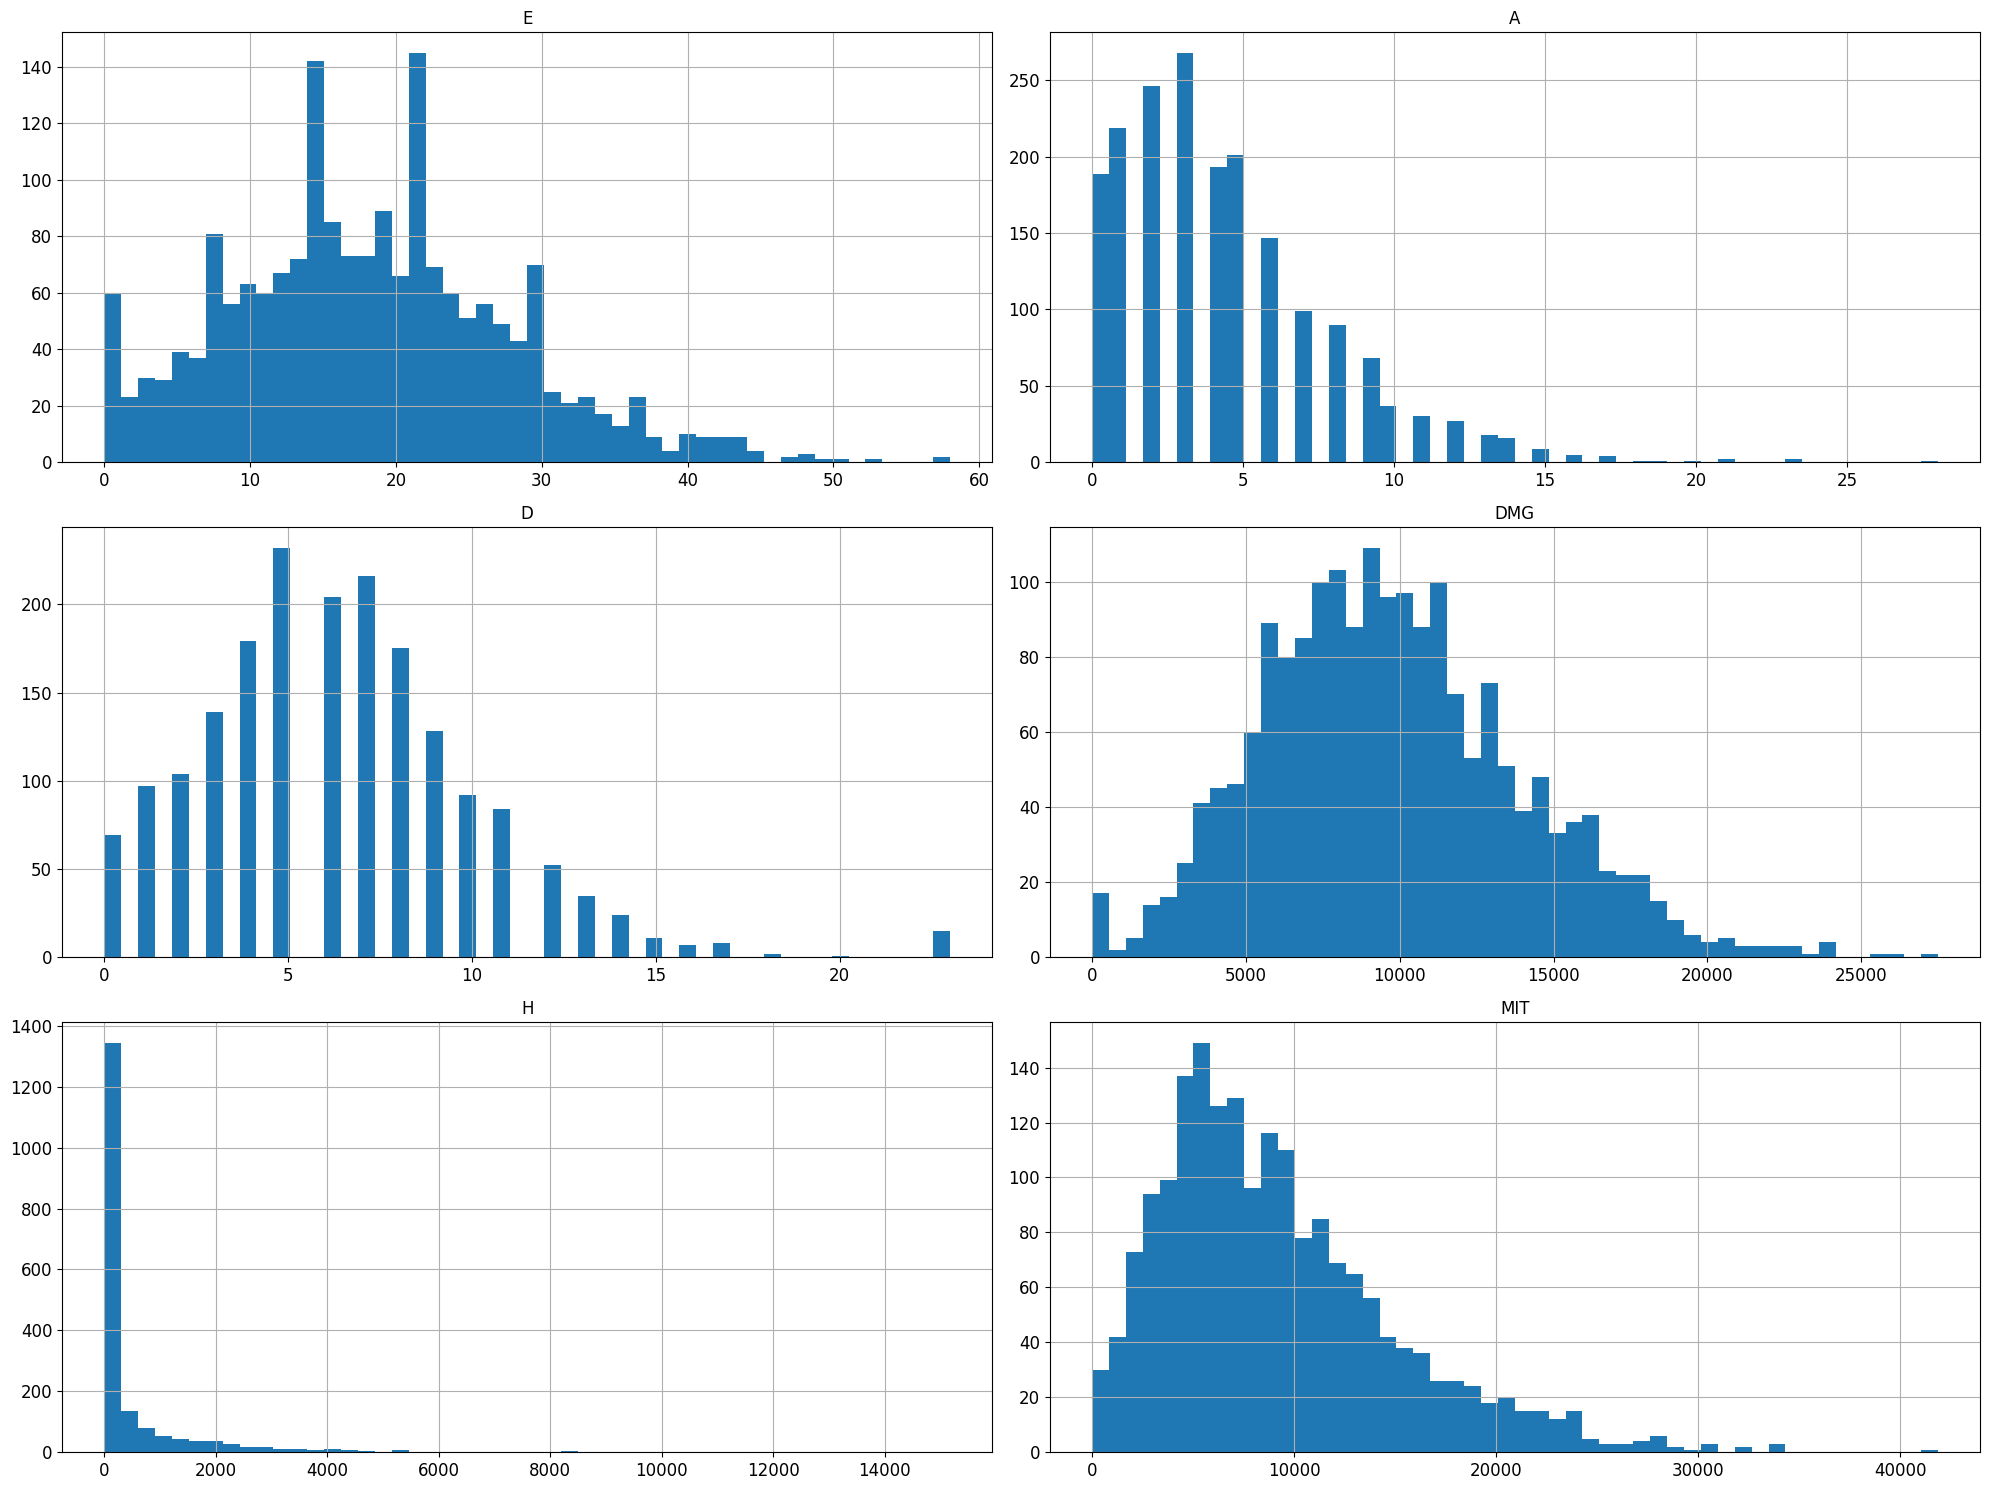

In [10]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


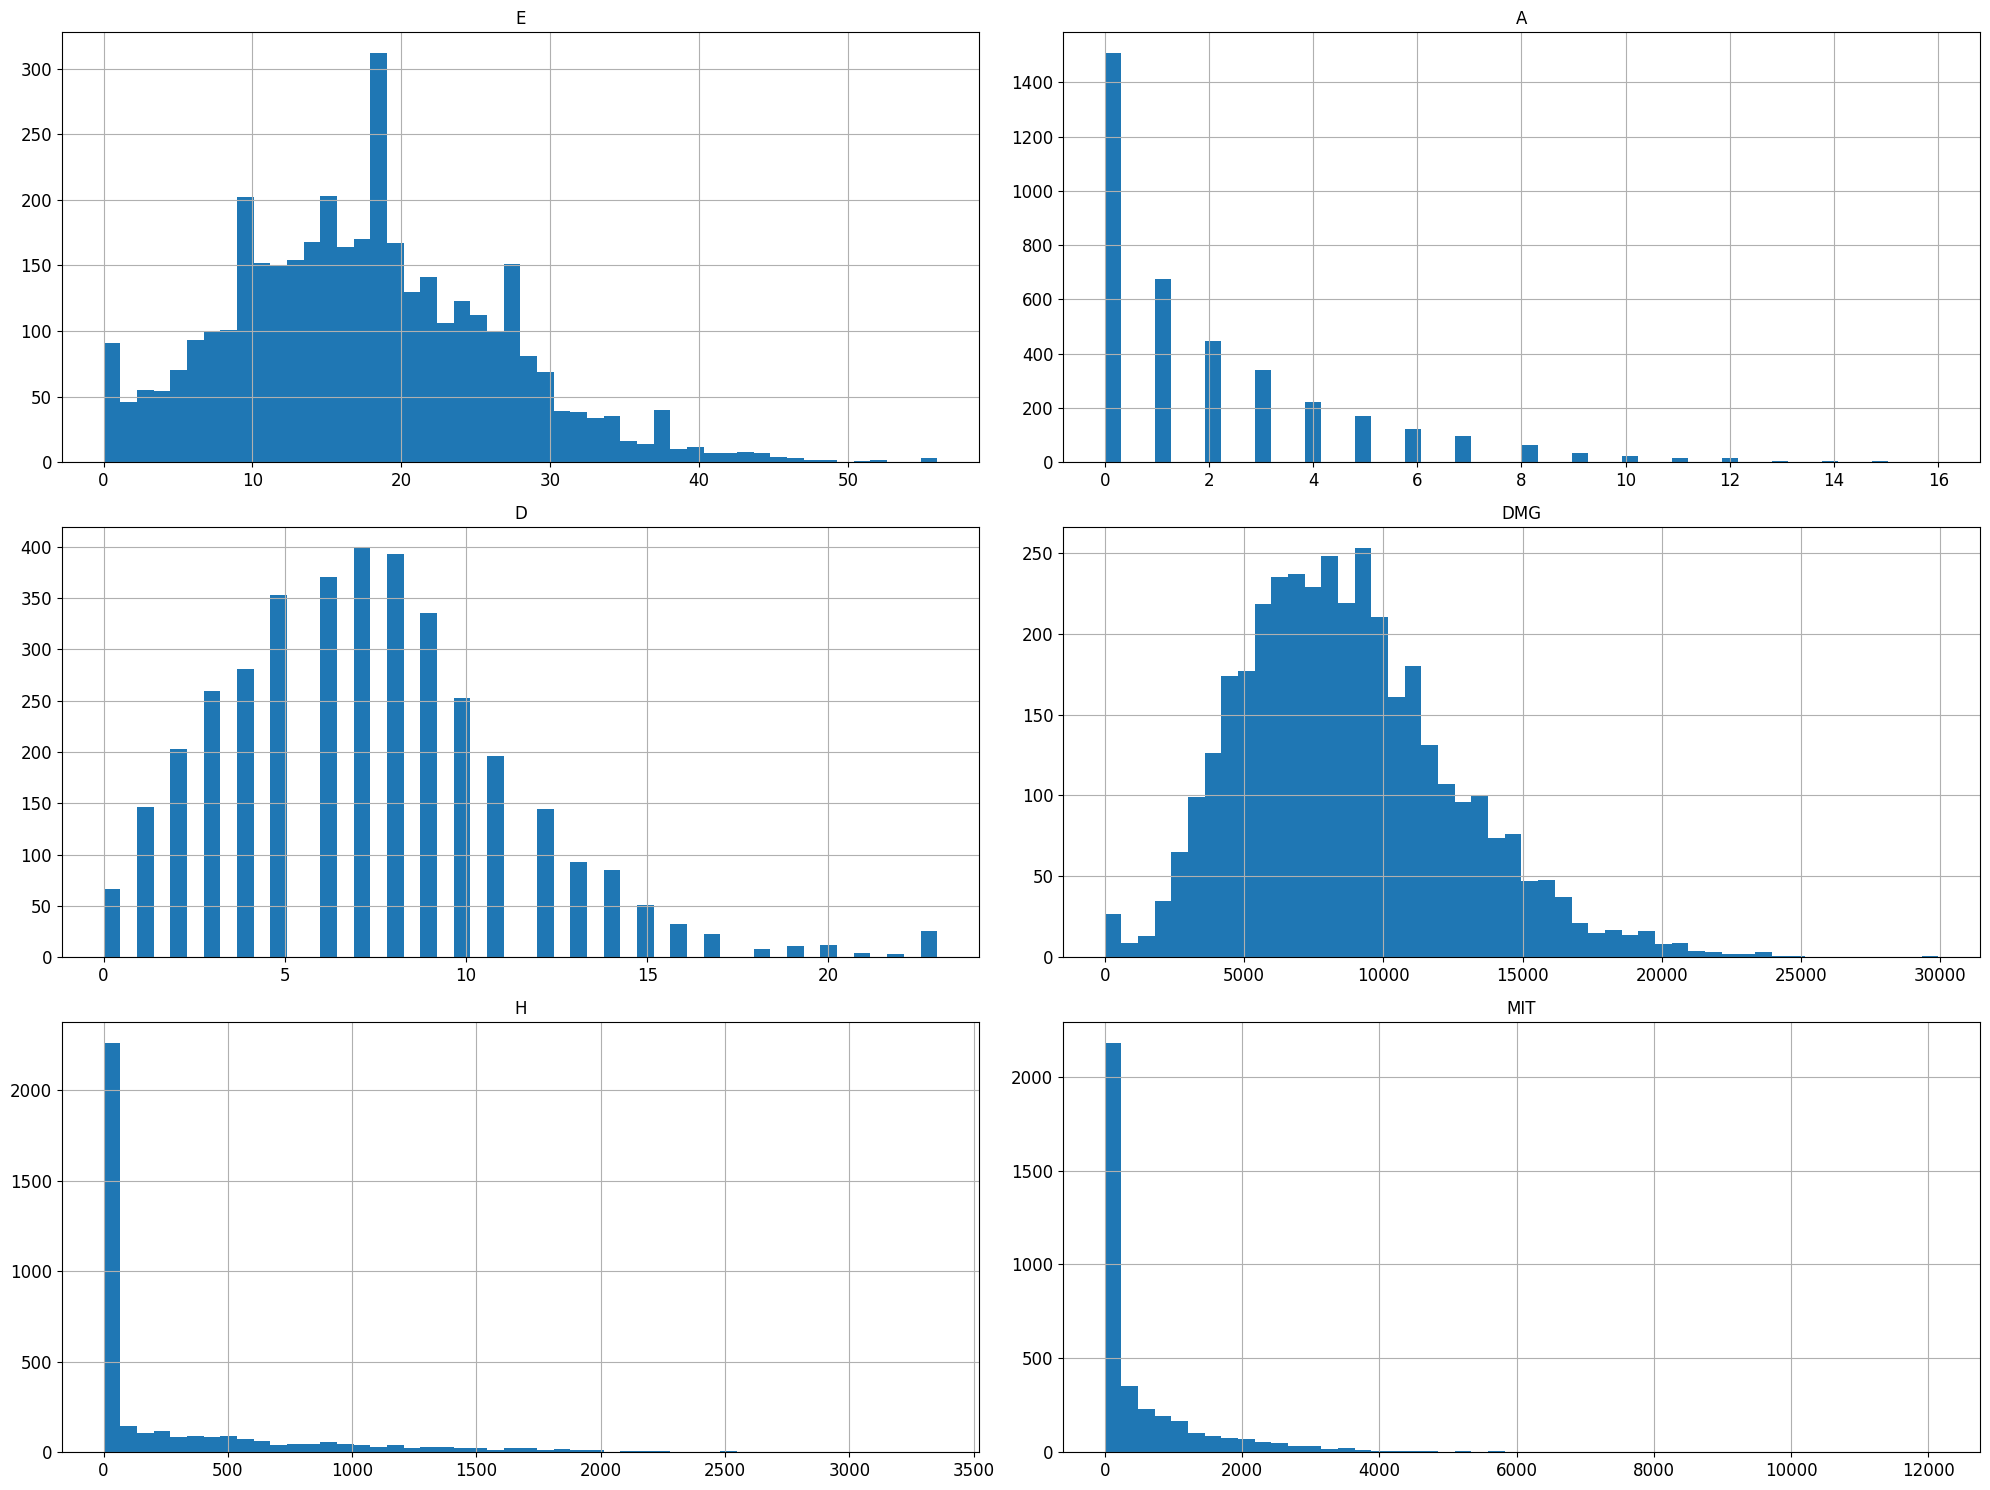

In [11]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


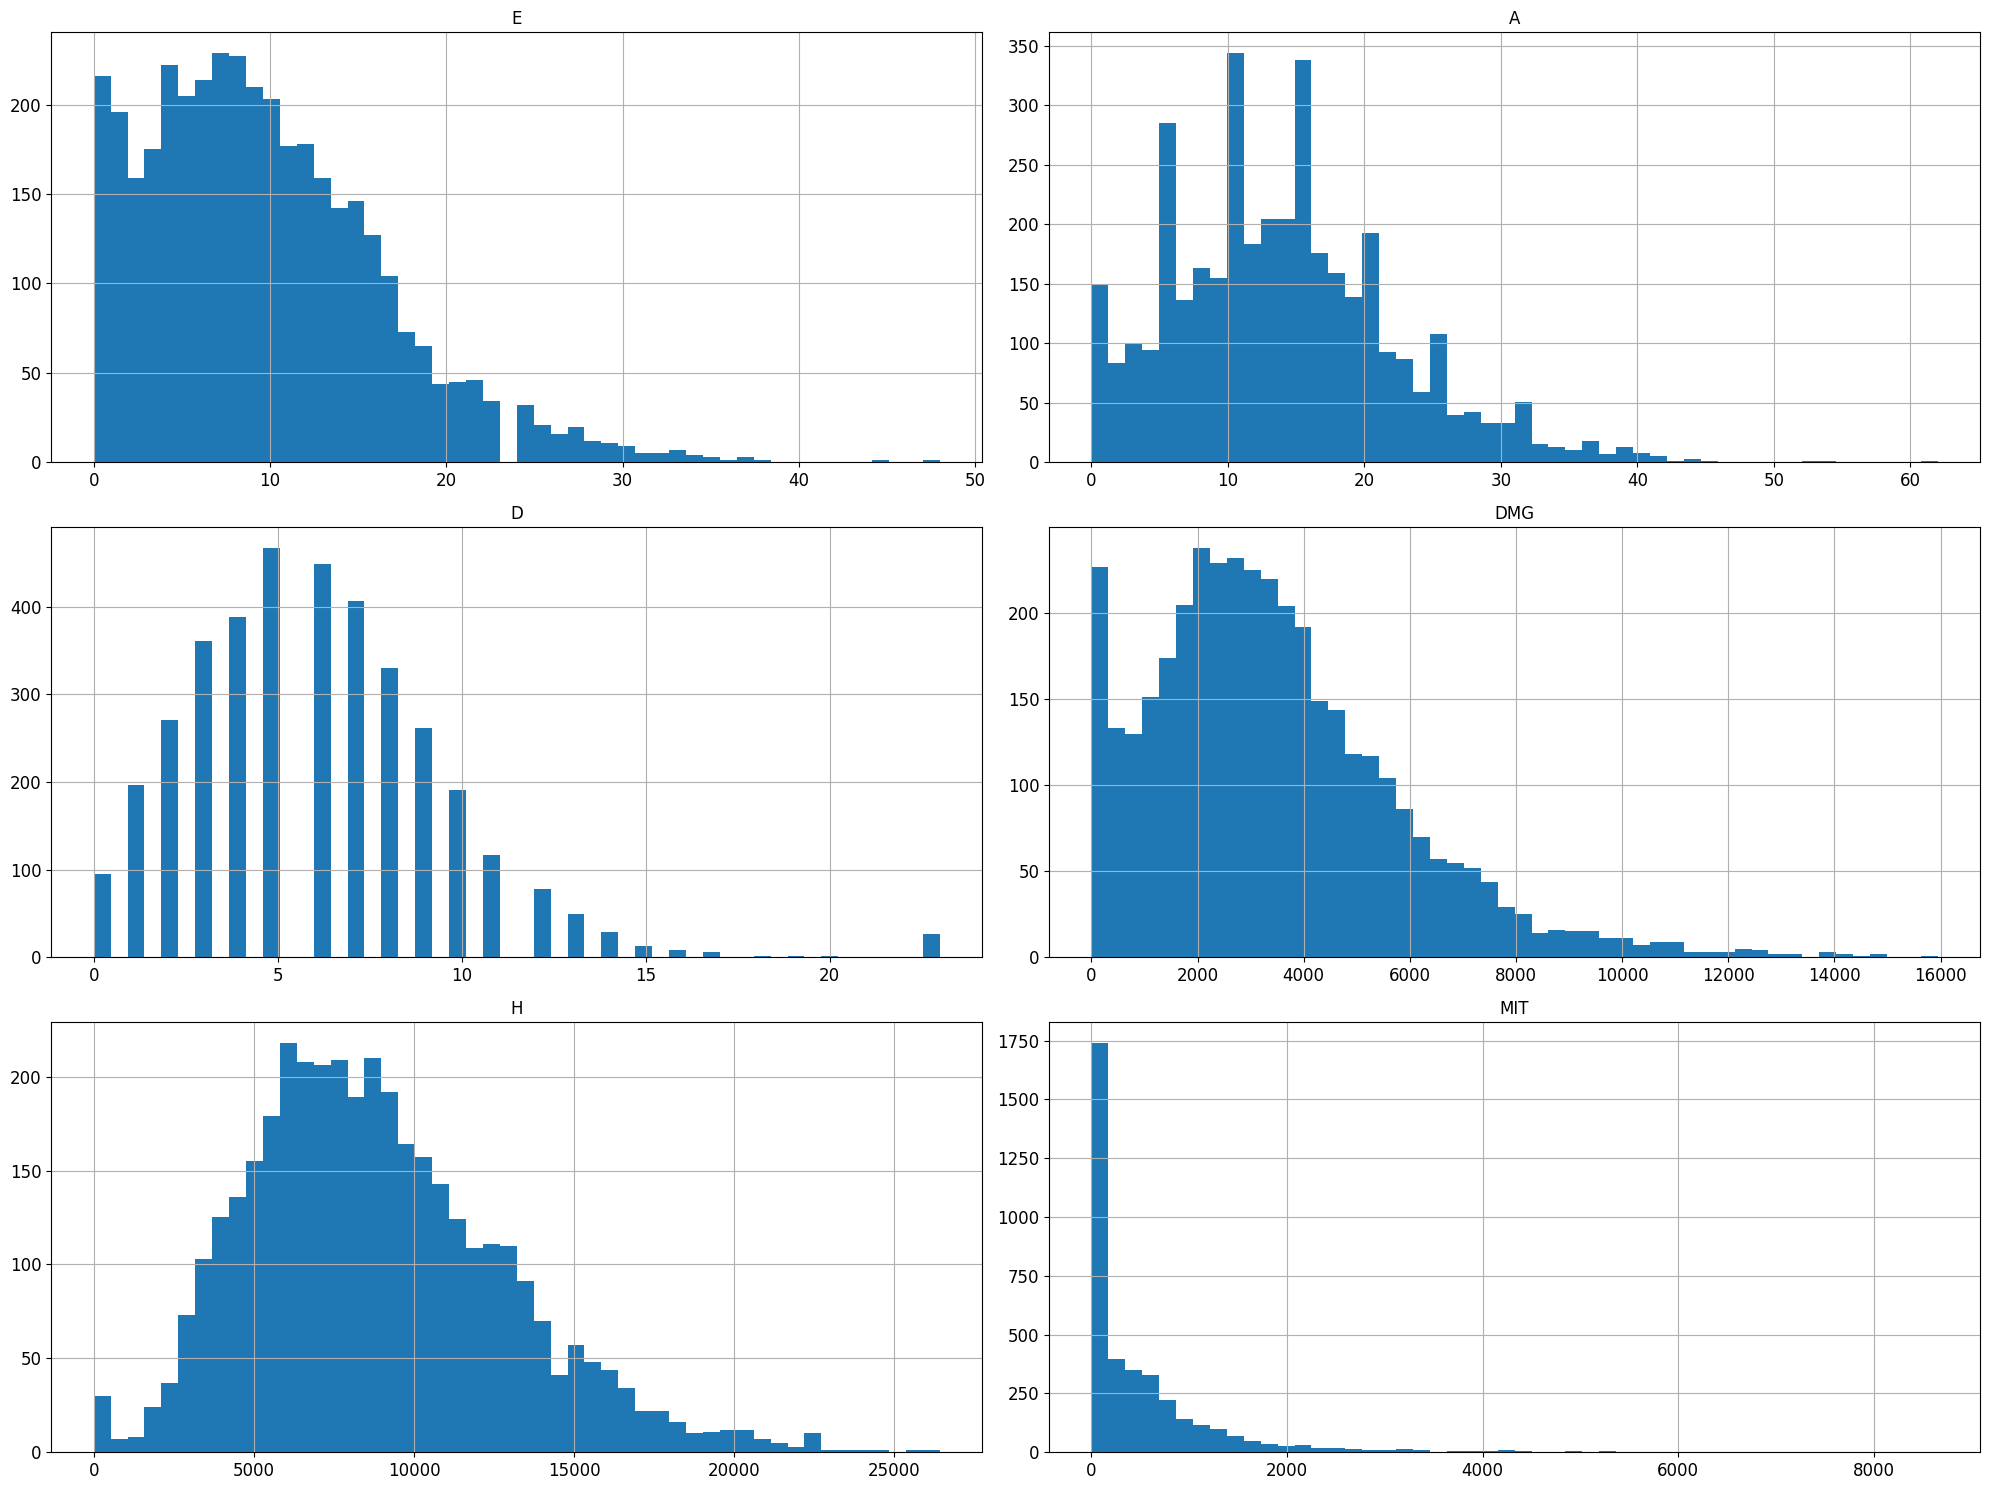

In [12]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [13]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D    DMG      H    MIT     GAME
931 0  41  13  16  18702    776  19177  VICTORY
    1  37  10  19  14617   1061   3129  VICTORY
    2  44   4  17  16048    737   2639  VICTORY
    3  25  40  15  13212  19701      0  VICTORY
    4  32  22  11  13727  15457    140  VICTORY
...    ..  ..  ..    ...    ...    ...      ...
304 5  18   2  13  13098      0  11317  VICTORY
    6  33   0   5  13433      0   2751  VICTORY
    7  20  12  12   8235      0      0  VICTORY
    8  19  19   5   5521   8860    908  VICTORY
    9  14  17   1   6020  11875   2212  VICTORY

[9370 rows x 7 columns]

In [14]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
931 0  0.706897  0.209677  0.695652  0.625025  0.029373  0.458243
    1  0.637931  0.161290  0.826087  0.488503  0.040160  0.074769
    2  0.758621  0.064516  0.739130  0.536328  0.027897  0.063060
    3  0.431034  0.645161  0.652174  0.441548  0.745713  0.000000
    4  0.551724  0.354839  0.478261  0.458759  0.585071  0.003345
...         ...       ...       ...       ...       ...       ...
304 5  0.310345  0.032258  0.565217  0.437738  0.000000  0.270425
    6  0.568966  0.000000  0.217391  0.448934  0.000000  0.065736
    7  0.344828  0.193548  0.521739  0.275216  0.000000  0.000000
    8  0.327586  0.306452  0.217391  0.184513  0.335365  0.021697
    9  0.241379  0.274194  0.043478  0.201190  0.449487  0.052857

[9370 rows x 6 columns]

In [16]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(937, 60)
(937,)


In [17]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.88829787, 0.92021277, 0.93048128, 0.92513369, 0.92513369])

In [18]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.64893617, 0.71276596, 0.68983957, 0.68983957, 0.76470588])

In [19]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.87765957, 0.89893617, 0.87165775, 0.90374332, 0.89839572])

In [20]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(SVC(), 0.9199908977130503),
 (LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9178518602798954),
 (LinearSVC(), 0.9178404824212084),
 (LogisticRegression(n_jobs=-1), 0.9167880304926612),
 (NuSVC(), 0.9157128228467402),
 (ExtraTreesClassifier(n_jobs=-1), 0.9135851632722721),
 (RandomForestClassifier(n_jobs=-1), 0.909318466264649),
 (NearestCentroid(), 0.908266014336102),
 (GradientBoostingClassifier(), 0.9039765616111047),
 (HistGradientBoostingClassifier(), 0.9029184207532142),
 (RidgeClassifier(), 0.9029013539651837),
 (AdaBoostClassifier(), 0.9028956650358403),
 (KNeighborsClassifier(n_jobs=-1), 0.9028842871771534),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.9018489020366367),
 (RidgeClassifierCV(), 0.9018375241779497),
 (SGDClassifier(n_jobs=-1), 0.896433041301627),
 (MLPClassifier(max_iter=3200), 0.8953919672317671),
 (Perceptron(n_jobs=-1), 0.88371828421891),
 (BaggingClassifier(n_jobs=-1), 0.8783650017066786),
 (DecisionTreeClassifier(), 0.8271760154738879),
 (ExtraTreeClass

In [21]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [22]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances_tanks = importances[tanks].sum(0)
        importances_damages = importances[damages].sum(0)
        importances_supports = importances[supports].sum(0)
        importances[tanks] = importances_tanks / 2
        importances[damages] = importances_damages / 4
        importances[supports] = importances_supports / 4
        joblib.dump(importances, 'importances.joblib')

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title} (10인): {importance * 100:.2f}%')

        print('\n**역할 중요도**')
        for importance, title in sorted(
                zip((importances[tanks].sum(), importances[damages].sum(), importances[supports].sum()), ('돌격 (2인)', '공격 (4인)', '지원 (4인)')),
                reverse=True
        ):
            print(f'{title}: {importance * 100:.2f}%')

        print('\n**돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tanks, titles), reverse=True):
            print(f'{title} (2인): {importance * 100:.2f}%')

        print('\n**공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damages, titles), reverse=True):
            print(f'{title} (4인): {importance * 100:.2f}%')

        print('\n**지원 특성 중요도**')
        for importance, title in sorted(zip(importances_supports, titles), reverse=True):
            print(f'{title} (4인): {importance * 100:.2f}%')

        break

**특성 중요도**
처치 (10인): 32.35%
죽음 (10인): 28.32%
도움 (10인): 17.91%
피해 (10인): 8.36%
경감 (10인): 6.53%
치유 (10인): 6.52%

**역할 중요도**
지원 (4인): 38.93%
공격 (4인): 35.87%
돌격 (2인): 25.20%

**돌격 특성 중요도**
처치 (2인): 8.72%
죽음 (2인): 8.30%
도움 (2인): 3.63%
피해 (2인): 2.08%
경감 (2인): 1.27%
치유 (2인): 1.19%

**공격 특성 중요도**
처치 (4인): 16.29%
죽음 (4인): 8.40%
피해 (4인): 3.45%
도움 (4인): 3.02%
경감 (4인): 2.49%
치유 (4인): 2.23%

**지원 특성 중요도**
죽음 (4인): 11.62%
도움 (4인): 11.26%
처치 (4인): 7.34%
치유 (4인): 3.10%
피해 (4인): 2.84%
경감 (4인): 2.77%


In [28]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -players):
    defeat_i = defeat[i:i + players]
    print(f'DEFEAT ({i // players + 1})')
    print(defeat_i)
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    
    # contributions[:, 2] = 1 - contributions[:, 2]
    # contributions *= importances
    # contributions = contributions.sum(1)
    # contributions[tanks] *= 2 / contributions[tanks].sum()
    # contributions[damages] *= 4 / contributions[damages].sum()
    # contributions[supports] *= 4 / contributions[supports].sum()

    averages = importances.sum(0) / len(importances)
    contributions = (contributions * averages).sum(1)
    contributions *= players / contributions.sum()
    
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

DEFEAT (467)
       E   A  D    DMG      H    MIT     GAME
4660  11   1  4  11189      0  26690   DEFEAT
4661  17   2  7  12621      0      0   DEFEAT
4662  15   0  6   7688     20   1741   DEFEAT
4663   7  10  6   2937   9983   1478   DEFEAT
4664   2   8  8   1299   9612    279   DEFEAT
4665  17   2  5  11569      0  14047  VICTORY
4666  19   0  4  11299      0      0  VICTORY
4667  17   2  6  10642      0      0  VICTORY
4668   7  16  5   1836  13913    605  VICTORY
4669  14  21  3   5590   8795      0  VICTORY
TEAM 1: 0.96 1.15 0.94 0.91 0.83
TEAM 2: 1.12 0.97 1.06 0.97 1.10

DEFEAT (466)
       E   A   D    DMG      H    MIT     GAME
4650  14   4  10  16964   5592   4480   DEFEAT
4651  14   0  13   7985     20   1121   DEFEAT
4652  14   0  12   7563      0      0   DEFEAT
4653  12  13  11   6107   8112      0   DEFEAT
4654  10  10   8   4408  10874   1453   DEFEAT
4655  33   7   6  16604    600  13913  VICTORY
4656  25   1   5  12934      0      0  VICTORY
4657  32   0   6  11940  

In [29]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -players):
    victory_i = victory[i:i + players]
    print(f'VICTORY ({i // players + 1})')
    print(victory_i)
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

VICTORY (470)
       E   A  D    DMG     H   MIT     GAME
4690  28  11  4  10275   361  9589  VICTORY
4691  20   0  4   5979     0     0  VICTORY
4692  20   1  6  13185   614     0  VICTORY
4693  13  18  2   4990  8589   555  VICTORY
4694  18  14  4   3859  7320     0  VICTORY
4695   9   2  9   6061  2782  5820   DEFEAT
4696   9   1  7   9798  1027  1141   DEFEAT
4697  10   0  9   9141     0    20   DEFEAT
4698   7   3  8   4594  5856     0   DEFEAT
4699   2   8  4   3045  8775   889   DEFEAT
TEAM 1: 1.27 1.17 1.19 1.23 1.13
TEAM 2: 0.73 0.86 0.79 0.73 0.91

VICTORY (469)
       E   A  D    DMG     H    MIT     GAME
4680  21   6  5  11246  1103   1791  VICTORY
4681  20   0  5   7237     0      0  VICTORY
4682  14   5  5   5615   309   2586  VICTORY
4683   6  16  3   2294  8101    741  VICTORY
4684  14  16  5   6465  5427      0  VICTORY
4685   9   1  7   7688   727  11878   DEFEAT
4686  11   1  7   6994    40   1639   DEFEAT
4687  10   1  9   6889     0      0   DEFEAT
4688   6   8  8 

In [25]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(keras.Input((total_features,)))
model.add(layers.Dense(300, 'relu'))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2025-04-29 10:16:43.517907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745921803.533555    6539 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745921803.538269    6539 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745921803.551888    6539 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745921803.551896    6539 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745921803.551898    6539 computation_placer.cc:177] computation placer alr

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │        18,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,501 (189.46 KB)

 Trainable params: 48,501 (189.46 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4816 - loss: 0.6956 - val_accuracy: 0.6979 - val_loss: 0.6772
Epoch 2/256
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7257 - loss: 0.6759 - val_accuracy: 0.8936 - val_loss: 0.6670
Epoch 3/256
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8915 - loss: 0.6646 - val_accuracy: 0.8979 - val_loss: 0.6581
Epoch 4/256
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9046 - loss: 0.6545 - val_accuracy: 0.8979 - val_loss: 0.6491
Epoch 5/256
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8998 - loss: 0.6432 - val_accuracy: 0.9106 - val_loss: 0.6401
Epoch 6/256
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8679 - loss: 0.6363 - val_accuracy: 0.9149 - val_loss: 0.6310
Epoch 7/256
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8765 - loss: 0.6271 - val_accuracy: 0.9149 - val_loss: 0.6218
Epoch 8/256
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8966 - loss: 0.6136 - val_accuracy: 0.9149 - v

(0.2481725960969925, 0.936170220375061)